In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Acer\Desktop\projectsmaterials\customerchurn.csv')
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#Replacing the blanks with 0 as tenure is zero and no total charges are recorded

In [3]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
"""isnull tells us if we are having any 'null' values in the data and returns
true or false, sum returns the sum of all those values""" 
df.isnull().sum().sum()

0

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
"""this was checked on the basis of rows, if we have any duplicates"""
"""hence, we also make sure if we have unique values or there might be enetries from the same customerID"""

df["customerID"].duplicated().sum()

"""on the basis of customerID(PK) we found no duplicates, hence 0 is the answer (FALSE)"""

'on the basis of customerID(PK) we found no duplicates, hence 0 is the answer (FALSE)'

In [9]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
     
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [10]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#In the 'SeniorCitizen' column, we had values as 0 OR 1, which meant either they are senior citizen or not, hence we converted them as YES OR NO by defining a function

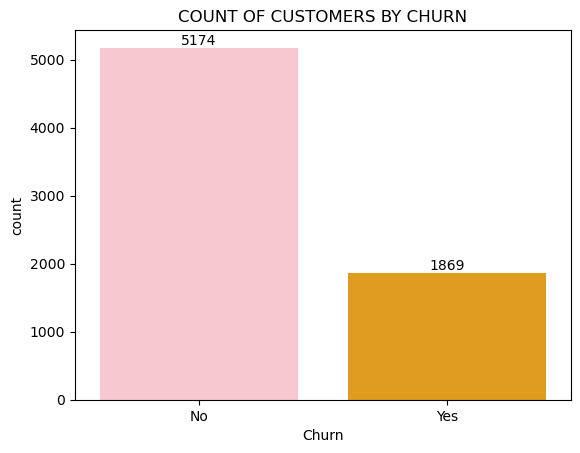

In [11]:
ax = sns.countplot(x = 'Churn', data = df, palette = ['pink', 'orange'])
ax.bar_label(ax.containers[0]) 
# To draw out the actual numerical values of the bar"""
plt.title('COUNT OF CUSTOMERS BY CHURN')
plt.show()

#The bar chart makes the chart more informative by showing the exact values of each bar on the plot itself, without needing to hover over the bar or check the axis scale.

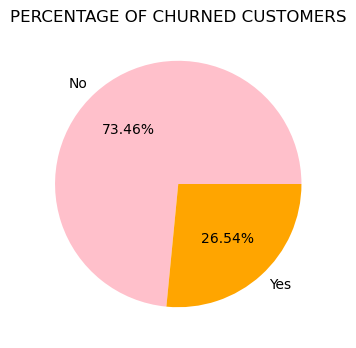

In [12]:
plt.figure(figsize = (4,4))
gb = df.groupby('Churn').agg({'Churn' : "count"})
colors = ['pink', 'orange']
plt.pie(gb['Churn'], labels = gb.index, colors=colors, autopct='%1.2f%%')   # autopct to show percentage labels
plt.title('PERCENTAGE OF CHURNED CUSTOMERS')
plt.show()

#From the given pie chart, we can conlcude that 26.54% of our customers have churned out
#Now, Let's explore the reason behind it

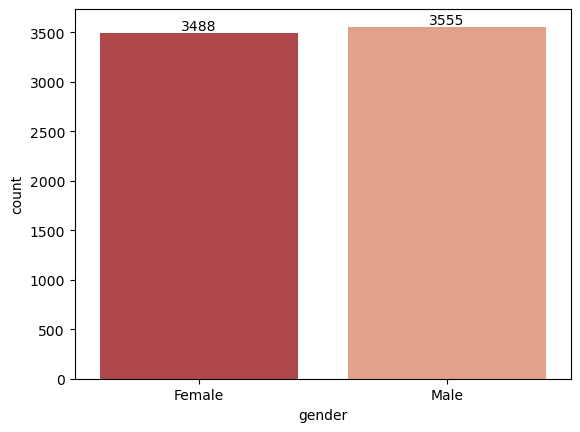

<Figure size 300x300 with 0 Axes>

In [13]:
sns.set_palette('RdBu')
ay = sns.countplot(x ='gender', data = df)
for container in ay.containers:
    ay.bar_label(container)

plt.figure(figsize = (3,3))
plt.show()

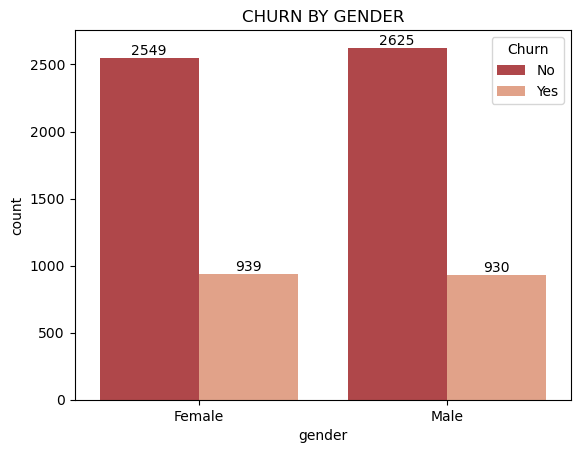

<Figure size 400x400 with 0 Axes>

In [14]:

sns.set_palette('RdBu')
ay = sns.countplot(x ='gender', data = df, hue = 'Churn')
for container in ay.containers:
    ay.bar_label(container)
plt.title("CHURN BY GENDER")   
plt.figure(figsize = (4,4))

plt.show()

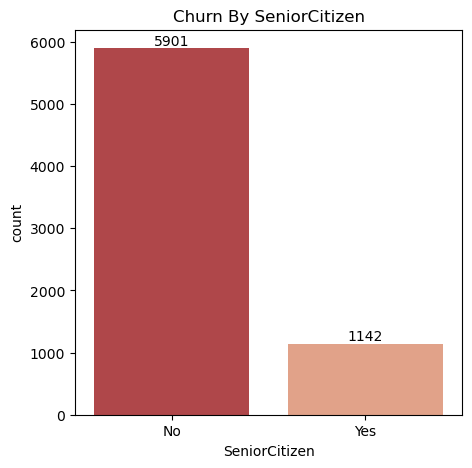

In [15]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title('Churn By SeniorCitizen')
plt.show()



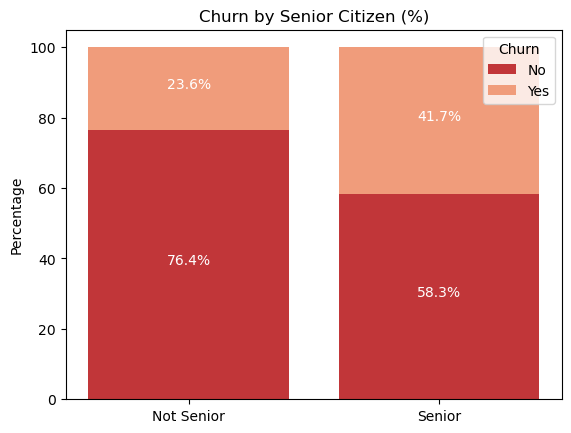

In [16]:
senior_churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

totals = senior_churn_counts.sum(axis=1)
percentages = senior_churn_counts.divide(totals, axis=0) * 100

bottom = np.zeros(len(percentages))
for i, churn_category in enumerate(percentages.columns):
    plt.bar(percentages.index, percentages[churn_category], bottom=bottom, label=churn_category)
    bottom += percentages[churn_category]

# Add percentage labels on the bars
bottom = np.zeros(len(percentages))  # Reset bottom to use for text labels
for i, total in enumerate(totals):
    for j, churn_category in enumerate(percentages.columns):
        percent = percentages.iloc[i, j]
        if percent > 0:  # Only add labels for non-zero percentages
            plt.text(i, bottom[i] + percent / 2, f'{percent:.1f}%', ha='center', color='white', fontsize=10)
        bottom[i] += percent  # Update the bottom value for each category

# Customize the plot
plt.title('Churn by Senior Citizen (%)')
plt.xticks([0, 1], ['Not Senior', 'Senior'], rotation=0)
plt.ylabel('Percentage')
plt.legend(title='Churn')

plt.show()



#Comparitively a greater percentage of people in senior citizen category have churned.

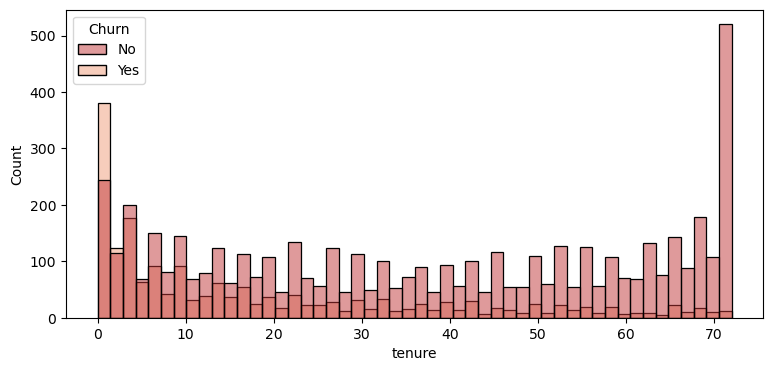

In [27]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure', data = df, bins = 50, hue = 'Churn')
            
plt.show()

#People who have used out services for a long time have stayed and people who have used our servies for short time have left out

#Many people have left the services within the initial few months, those who have used it for a long time have actually used services well.

# We also need to see if the people who have stayed for a longer time is based on their contracts.

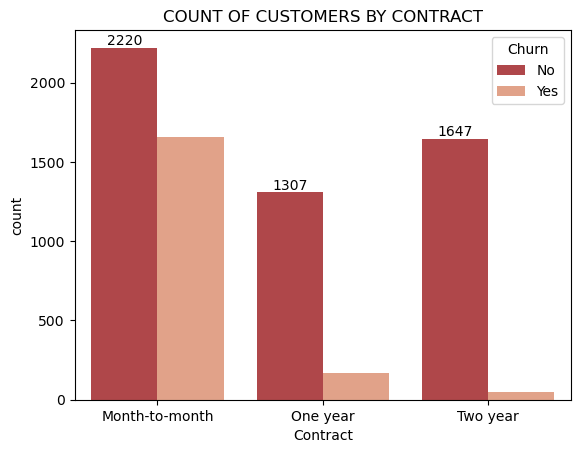

In [31]:
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0]) 
# To draw out the actual numerical values of the bar"""
plt.title('COUNT OF CUSTOMERS BY CONTRACT')
plt.show()

#Hence, we could see that the people who are having their contract based on month to month basis are likely to churn than those who are having their contract based on yearly basis

In [33]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

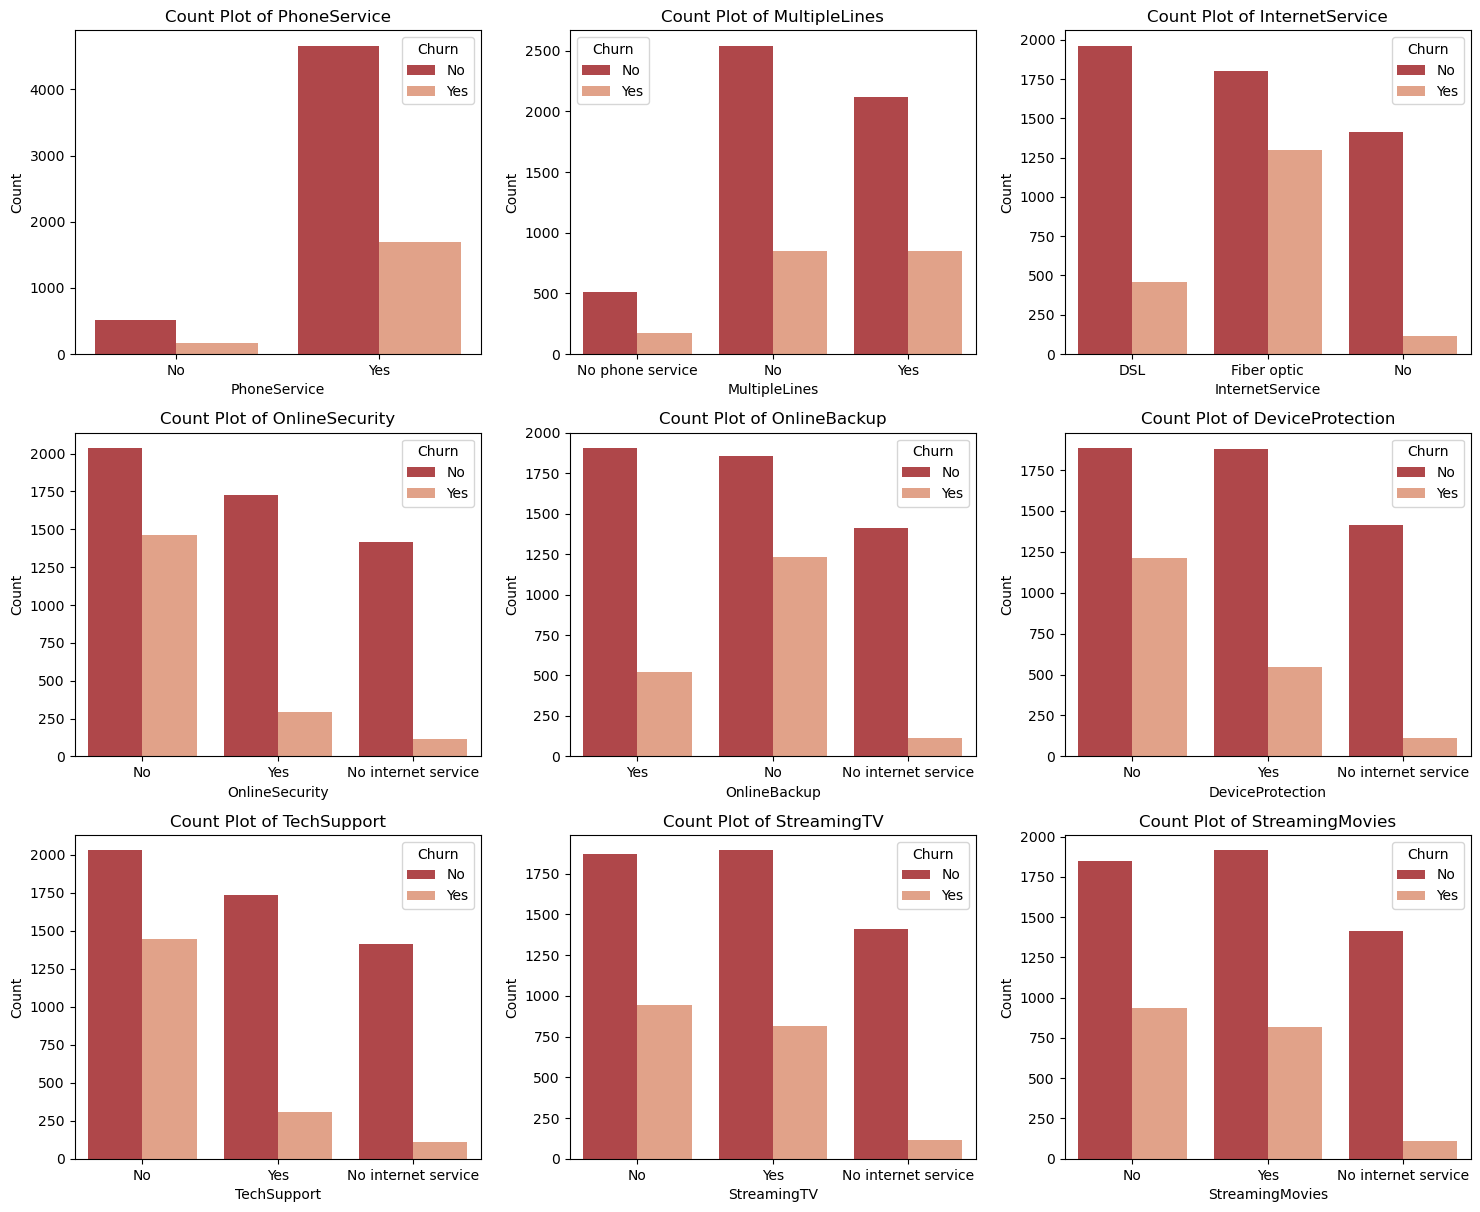

In [35]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols = 3
n_rows = len(columns) + n_cols - 1 // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x = col, data = df, ax = axes [i], hue = 'Churn')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

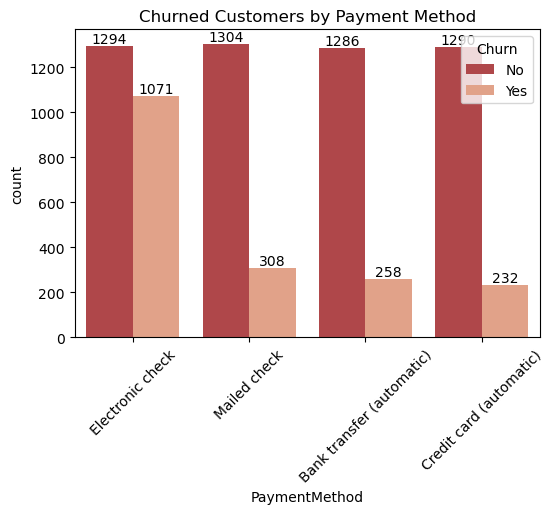

In [36]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

#Customer is likely to churn when he is using electronic check as a payment method.